# Data analyze
For this case, I only check the dev part

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [83]:
originalDev = pd.read_csv('dev/emotion/allcharlinepairs-original.csv')
originalTest = pd.read_csv('test/emotion/allcharlinepairs-original.csv')
cleanDev = pd.read_csv('dev/emotion/allcharlinepairs-clean-v1.csv')
cleanTest = pd.read_csv('test/emotion/allcharlinepairs-clean-v1.csv')
cleanNoCombine = pd.read_csv('dev/emotion/allcharlinepairs-clean-v1.csv')

In [84]:
cleanDev

,Unnamed: 0,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,0,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann0,NaN,I began making fish curry for my boyfriend and I.,yes,"['joy', 'excited', 'content', 'hungry', 'antic...","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
1,1,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann1,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,yes,"['excited', 'confident']","{'joy': 2, 'trust': 3, 'fear': 0, 'surprise': ..."
2,2,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,3,I (myself),ann0,I began making fish curry for my boyfriend and...,I let the curry sit before tasting.,yes,"['anxious', 'confident', 'positive']","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ..."
3,3,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,4,I (myself),ann1,I began making fish curry for my boyfriend and...,"When it was time to taste, I was disgusted.",yes,"['upset', 'sick']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ..."
4,4,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,5,I (myself),ann1,I began making fish curry for my boyfriend and...,I accidentally used a whole garlic instead of ...,yes,"['disgusted', 'cretinous']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ..."
...,...,...,...,...,...,...,...,...,...,...
11605,11605,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,1,Marcus,ann0,NaN,Marcus was collecting shells on the beach.,yes,"['intrigued', 'happy', 'contemplative']","{'joy': 3, 'trust': 1, 'fear': 0, 'surprise': ..."
11606,11606,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,2,Marcus,ann0,Marcus was collecting shells on the beach.,He picked up a large beautiful shell.,yes,"['awestruck', 'moved', 'joy']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
11607,11607,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,3,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,He put it in his pocket to save for later.,yes,"['satisfied', 'excited', 'curiosity']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
11608,11608,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,4,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,Suddenly he felt a sharp pinch.,yes,"['pained', 'sore', 'surprised']","{'joy': 1, 'trust': 0, 'fear': 2, 'surprise': ..."


In [85]:
cleanTest

,Unnamed: 0,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,0,a3e66276-ef27-426f-8a2f-329779f17038,1,Cook,ann0,NaN,A cook was carrying an armful of oranged in th...,yes,"['joy', 'useful', 'nervous']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
1,1,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann0,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,"['annoyed', 'angry', 'frustrated']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ..."
2,2,a3e66276-ef27-426f-8a2f-329779f17038,3,Cook,ann0,A cook was carrying an armful of oranged in th...,As a joke he pretended that it was a soccer ball.,yes,"['amused', 'playful', 'embarrassed']","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ..."
3,3,a3e66276-ef27-426f-8a2f-329779f17038,4,Cook,ann0,A cook was carrying an armful of oranged in th...,He kicked the orange across the kitchen.,yes,"['playful', 'angry']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
4,4,a3e66276-ef27-426f-8a2f-329779f17038,5,Cook,ann0,A cook was carrying an armful of oranged in th...,It landed in a pot and he cheered!,yes,"['great', 'amused', 'surprised', 'delighted']","{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ..."
...,...,...,...,...,...,...,...,...,...,...
11124,11124,09805ba9-a9bc-40af-9c29-f81b5c89e714,5,Carol,ann0,Carol woke up to use the restroom at night.|Sh...,Carol had to move around in the dark.,yes,"['worried', 'anxious']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ..."
11125,11125,9b53627e-41e5-47e6-9c6c-74d485572958,2,Rosemary,ann0,Rosemary was eating a snack.,She was at a party that had amazing food set out.,yes,"['glad', 'satisfied', 'excited']","{'joy': 3, 'trust': 2, 'fear': 0, 'surprise': ..."
11126,11126,9b53627e-41e5-47e6-9c6c-74d485572958,3,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,She had been dieting for weeks and was starving.,yes,"['agitated', 'deprived', 'famished']","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ..."
11127,11127,9b53627e-41e5-47e6-9c6c-74d485572958,4,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,"After she stuffed herself, she regretted it.",yes,"['gross', 'regret']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ..."


In [78]:
originalDev

,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann0,NaN,I began making fish curry for my boyfriend and I.,yes,[Joy and excited to be making the food],"{'joy': 3, 'trust': 3, 'surprise': 3, 'anticip..."
1,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann1,NaN,I began making fish curry for my boyfriend and I.,yes,[content],{'joy': 2}
2,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann2,NaN,I began making fish curry for my boyfriend and I.,yes,"[hungry, anticipation]","{'joy': 2, 'anticipation': 3}"
3,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,Boyfriend,none,NaN,I began making fish curry for my boyfriend and I.,no,[none],{}
4,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann0,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,yes,[I decided not to read a recipe since I've mad...,"{'joy': 2, 'trust': 2, 'fear': 3, 'surprise': ..."
...,...,...,...,...,...,...,...,...,...
53229,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,4,Crab,none,Marcus was collecting shells on the beach.|He ...,Suddenly he felt a sharp pinch.,no,[none],{}
53230,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,[shocked],"{'fear': 2, 'surprise': 3, 'anticipation': 3}"
53231,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann1,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,[surprised],"{'fear': 2, 'surprise': 3, 'anticipation': 2}"
53232,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann2,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,[pained],"{'fear': 3, 'surprise': 3, 'anticipation': 3}"


In [79]:
originalTest

,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,a3e66276-ef27-426f-8a2f-329779f17038,1,Cook,ann0,NaN,A cook was carrying an armful of oranged in th...,yes,[joy],"[joy:3, trust:3, surprise:2, anticipation:2]"
1,a3e66276-ef27-426f-8a2f-329779f17038,1,Cook,ann1,NaN,A cook was carrying an armful of oranged in th...,yes,"[useful, nervous]","[joy:2, anticipation:2]"
2,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann0,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,[annoyed],"[fear:2, surprise:2, anticipation:2]"
3,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann1,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,"[angry at himself, disgusted]","[disgust:2, anger:3]"
4,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann2,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,[frustrated],"[surprise:2, anger:2]"
...,...,...,...,...,...,...,...,...,...
51886,9b53627e-41e5-47e6-9c6c-74d485572958,4,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,"After she stuffed herself, she regretted it.",yes,[gross],[disgust:3]
51887,9b53627e-41e5-47e6-9c6c-74d485572958,4,Rosemary,ann1,Rosemary was eating a snack.|She was at a part...,"After she stuffed herself, she regretted it.",yes,[regret],[sadness:2]
51888,9b53627e-41e5-47e6-9c6c-74d485572958,5,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,Rosemary swore to eat healthier tomorrow.,yes,[to continue dieting],"[joy:2, trust:3, anticipation:2]"
51889,9b53627e-41e5-47e6-9c6c-74d485572958,5,Rosemary,ann1,Rosemary was eating a snack.|She was at a part...,Rosemary swore to eat healthier tomorrow.,yes,[ashamed],"[sadness:2, disgust:2, anger:2]"


In [59]:
numberOfStory = set()
for id in original['storyid']:
    numberOfStory.add(id)
print(len(numberOfStory))

2483


Check data basic info

In [60]:
print("Shape info: \n\torigial:", original.shape, "\n\tclean:  ", clean.shape)
print("\n\nData type:\n\torigial:", original.dtypes, "\n\tclean:  ", clean.dtypes)

Shape info: 
	origial: (53234, 9) 
	clean:   (42954, 10)


Data type:
	origial: storyid            object
linenum             int64
char               object
emotionworkerid    object
context            object
sentence           object
affected           object
emotion            object
plutchik           object
dtype: object 
	clean:   Unnamed: 0          int64
storyid            object
linenum             int64
char               object
emotionworkerid    object
context            object
sentence           object
affected           object
emotion            object
plutchik           object
dtype: object


# affected == 'no' <--> emotion == 'none'

In [61]:
originalDev[original['affected'] == 'no']

,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
3,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,Boyfriend,none,NaN,I began making fish curry for my boyfriend and I.,no,"[""none""]","[""none""]"
7,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,Boyfriend,none,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,no,"[""none""]","[""none""]"
11,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,3,Boyfriend,none,I began making fish curry for my boyfriend and...,I let the curry sit before tasting.,no,"[""none""]","[""none""]"
15,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,4,Boyfriend,none,I began making fish curry for my boyfriend and...,"When it was time to taste, I was disgusted.",no,"[""none""]","[""none""]"
19,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,5,Boyfriend,none,I began making fish curry for my boyfriend and...,I accidentally used a whole garlic instead of ...,no,"[""none""]","[""none""]"
...,...,...,...,...,...,...,...,...,...
53217,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,1,Crab,none,NaN,Marcus was collecting shells on the beach.,no,"[""none""]","[""none""]"
53221,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,2,Crab,none,Marcus was collecting shells on the beach.,He picked up a large beautiful shell.,no,"[""none""]","[""none""]"
53225,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,3,Crab,none,Marcus was collecting shells on the beach.|He ...,He put it in his pocket to save for later.,no,"[""none""]","[""none""]"
53229,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,4,Crab,none,Marcus was collecting shells on the beach.|He ...,Suddenly he felt a sharp pinch.,no,"[""none""]","[""none""]"


# Distribution Check

In [62]:
# 习惯性改一下emotion和Plutchik的type, 后续好操作 - original
import ast
originalDev['emotion'] = [list(i.strip() for i in (x.strip('[').strip(']').strip('\"').strip().replace("\", \"", ", ").split(', ')))  for x in originalDev['emotion']]
originalDev['plutchik'] = [ast.literal_eval(x.replace(":", "\" : ").replace("\",", ",").replace("[", "{").replace("\"]", "}").replace("]", "}")) 
                        if "none" not in x else {} for x in originalDev['plutchik']]
originalDev

,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann0,NaN,I began making fish curry for my boyfriend and I.,yes,[Joy and excited to be making the food],"{'joy': 3, 'trust': 3, 'surprise': 3, 'anticip..."
1,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann1,NaN,I began making fish curry for my boyfriend and I.,yes,[content],{'joy': 2}
2,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann2,NaN,I began making fish curry for my boyfriend and I.,yes,"[hungry, anticipation]","{'joy': 2, 'anticipation': 3}"
3,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,Boyfriend,none,NaN,I began making fish curry for my boyfriend and I.,no,[none],{}
4,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann0,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,yes,[I decided not to read a recipe since I've mad...,"{'joy': 2, 'trust': 2, 'fear': 3, 'surprise': ..."
...,...,...,...,...,...,...,...,...,...
53229,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,4,Crab,none,Marcus was collecting shells on the beach.|He ...,Suddenly he felt a sharp pinch.,no,[none],{}
53230,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,[shocked],"{'fear': 2, 'surprise': 3, 'anticipation': 3}"
53231,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann1,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,[surprised],"{'fear': 2, 'surprise': 3, 'anticipation': 2}"
53232,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann2,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,[pained],"{'fear': 3, 'surprise': 3, 'anticipation': 3}"


In [63]:
# 习惯性改一下emotion和Plutchik的type, 后续好操作 - clean
import ast
clean['emotion'] = [list(i.strip() for i in (x.strip('[').strip(']').strip('\"').strip().replace("\", \"", ", ").split(', ')))  for x in clean['emotion']]
clean['plutchik'] = [ast.literal_eval(x) if "none" not in x else {} for x in clean['plutchik']]
clean

,Unnamed: 0,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,0,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann0,NaN,I began making fish curry for my boyfriend and I.,yes,"['joy', 'excited']","{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': ..."
1,1,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann1,NaN,I began making fish curry for my boyfriend and I.,yes,['content'],"{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ..."
2,2,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann2,NaN,I began making fish curry for my boyfriend and I.,yes,"['hungry', 'anticipation']","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ..."
3,3,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann1,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,yes,['excited'],"{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': ..."
4,4,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann2,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,yes,['confident'],"{'joy': 2, 'trust': 3, 'fear': 0, 'surprise': ..."
...,...,...,...,...,...,...,...,...,...,...
42949,42949,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,4,Marcus,ann1,Marcus was collecting shells on the beach.|He ...,Suddenly he felt a sharp pinch.,yes,['sore'],"{'joy': 2, 'trust': 2, 'fear': 2, 'surprise': ..."
42950,42950,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,4,Marcus,ann2,Marcus was collecting shells on the beach.|He ...,Suddenly he felt a sharp pinch.,yes,['surprised'],"{'joy': 2, 'trust': 0, 'fear': 2, 'surprise': ..."
42951,42951,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,['shocked'],"{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ..."
42952,42952,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann1,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,['surprised'],"{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ..."


In [64]:
# 习惯性改一下emotion和Plutchik的type, 后续好操作 - clean
import ast
originalTest['emotion'] = [list(i.strip() for i in (x.strip('[').strip(']').strip('\"').strip().replace("\", \"", ", ").split(', ')))  for x in originalTest['emotion']]
originalTest['plutchik'] = [ast.literal_eval(x) if "none" not in x else {} for x in originalTest['plutchik']]
originalTest

,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,a3e66276-ef27-426f-8a2f-329779f17038,1,Cook,ann0,NaN,A cook was carrying an armful of oranged in th...,yes,[joy],"[joy:3, trust:3, surprise:2, anticipation:2]"
1,a3e66276-ef27-426f-8a2f-329779f17038,1,Cook,ann1,NaN,A cook was carrying an armful of oranged in th...,yes,"[useful, nervous]","[joy:2, anticipation:2]"
2,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann0,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,[annoyed],"[fear:2, surprise:2, anticipation:2]"
3,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann1,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,"[angry at himself, disgusted]","[disgust:2, anger:3]"
4,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann2,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,[frustrated],"[surprise:2, anger:2]"
...,...,...,...,...,...,...,...,...,...
51886,9b53627e-41e5-47e6-9c6c-74d485572958,4,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,"After she stuffed herself, she regretted it.",yes,[gross],[disgust:3]
51887,9b53627e-41e5-47e6-9c6c-74d485572958,4,Rosemary,ann1,Rosemary was eating a snack.|She was at a part...,"After she stuffed herself, she regretted it.",yes,[regret],[sadness:2]
51888,9b53627e-41e5-47e6-9c6c-74d485572958,5,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,Rosemary swore to eat healthier tomorrow.,yes,[to continue dieting],"[joy:2, trust:3, anticipation:2]"
51889,9b53627e-41e5-47e6-9c6c-74d485572958,5,Rosemary,ann1,Rosemary was eating a snack.|She was at a part...,Rosemary swore to eat healthier tomorrow.,yes,[ashamed],"[sadness:2, disgust:2, anger:2]"


In [65]:
# 习惯性改一下emotion和Plutchik的type, 后续好操作 - cleanCombine
import ast
cleanCombine['emotion'] = [list(i.strip() for i in (x.strip('[').strip(']').strip('\"').strip().replace("\", \"", ", ").split(', ')))  for x in cleanCombine['emotion']]
cleanCombine['plutchik'] = [ast.literal_eval(x.replace(":", "\" : ").replace("\",", ",").replace("[", "{").replace("\"]", "}").replace("]", "}")) 
                        if "none" not in x else {} for x in cleanCombine['plutchik']]
cleanCombine

,Unnamed: 0,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,0,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann0,NaN,I began making fish curry for my boyfriend and I.,yes,"['joy', 'excited', 'content', 'hungry', 'antic...","{'joy : 2, 'trust'': 1, 'fear : 0, 'surprise..."
1,1,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann1,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,yes,"['excited', 'confident']","{'joy : 2, 'trust'': 3, 'fear : 0, 'surprise..."
2,2,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,3,I (myself),ann0,I began making fish curry for my boyfriend and...,I let the curry sit before tasting.,yes,"['anxious', 'confident', 'positive']","{'joy : 1, 'trust'': 1, 'fear : 0, 'surprise..."
3,3,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,4,I (myself),ann1,I began making fish curry for my boyfriend and...,"When it was time to taste, I was disgusted.",yes,"['upset', 'sick']","{'joy : 0, 'trust'': 0, 'fear : 1, 'surprise..."
4,4,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,5,I (myself),ann1,I began making fish curry for my boyfriend and...,I accidentally used a whole garlic instead of ...,yes,"['disgusted', 'cretinous']","{'joy : 0, 'trust'': 0, 'fear : 0, 'surprise..."
...,...,...,...,...,...,...,...,...,...,...
11605,11605,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,1,Marcus,ann0,NaN,Marcus was collecting shells on the beach.,yes,"['intrigued', 'happy', 'contemplative']","{'joy : 3, 'trust'': 1, 'fear : 0, 'surprise..."
11606,11606,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,2,Marcus,ann0,Marcus was collecting shells on the beach.,He picked up a large beautiful shell.,yes,"['awestruck', 'moved', 'joy']","{'joy : 2, 'trust'': 1, 'fear : 0, 'surprise..."
11607,11607,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,3,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,He put it in his pocket to save for later.,yes,"['satisfied', 'excited', 'curiosity']","{'joy : 2, 'trust'': 1, 'fear : 0, 'surprise..."
11608,11608,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,4,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,Suddenly he felt a sharp pinch.,yes,"['pained', 'sore', 'surprised']","{'joy : 1, 'trust'': 0, 'fear : 2, 'surprise..."


# Distribution in emotion and plutchik

In [66]:
def countPlutchikRelatedInfo(data, keepInHighlyRelated):
    # 看一下内容状态
    # count related
    # 每个emotion x 在总字典X[x]中先记录一次freq，
    # 然后同case下的其它情感yi \in {[y1, ..., yn], s.t. yi != x}记录一下freq到Y[x][yi]
    emotionSum = {}
    for dataRow in data['plutchik']:
        for emotion, emotionWeight in dataRow.items():
            if emotion in emotionSum and emotionWeight > 0:
                relatedEmotionDict = emotionSum.get(emotion)[1];
                for relatedEmotion, relatedEmotionWeight in dataRow.items():
                    if relatedEmotion != emotion and relatedEmotionWeight > 0:
                        relatedEmotionDict[relatedEmotion] = relatedEmotionDict.get(relatedEmotion, 0) + 1
                emotionSum[emotion] = [emotionSum.get(emotion)[0]+1, dict(sorted(relatedEmotionDict.items(), key=lambda item: item[1], reverse = True))];
                
            elif emotionWeight > 0:
                emotionSum[emotion] = [1, {}];
    return [emotionSum, pd.DataFrame(list(zip( emotionSum.keys(),[x[0] for x in  emotionSum.values()], [list(x[1].keys())[0:keepInHighlyRelated] for x in  emotionSum.values()],
                                 [x[1] for x in  emotionSum.values()])), columns = ['emotion','freq','highly related', 'all related info']).sort_values(
                                 by=['freq'], na_position='first', ascending=False).reset_index(drop=True)];
        

In [67]:
def countEmoRelatedInfo(data, keepInHighlyRelated):
    # 看一下内容状态
    # count related
    # 每个emotion x 在总字典X[x]中先记录一次freq，
    # 然后同case下的其它情感yi \in {[y1, ..., yn], s.t. yi != x}记录一下freq到Y[x][yi]
    emotionSum = {}
    for dataRow in data['emotion']:
        for emotion in dataRow:
            emotion = emotion.replace("\'", "")
            if emotion in emotionSum:
                relatedEmotionDict = emotionSum.get(emotion)[1];
                for relatedEmotion in dataRow:
                    relatedEmotion = relatedEmotion.replace("\'", "")
                    if relatedEmotion != emotion:
                        relatedEmotionDict[relatedEmotion] = relatedEmotionDict.get(relatedEmotion, 0) + 1
                emotionSum[emotion] = [emotionSum.get(emotion)[0]+1, dict(sorted(relatedEmotionDict.items(), key=lambda item: item[1], reverse = True))];
                
            else:
                emotionSum[emotion] = [1, {}];
    return [emotionSum, pd.DataFrame(list(zip(emotionSum.keys(),
                                              [x[0] for x in  emotionSum.values()], 
                                              [list(x[1].keys())[0:keepInHighlyRelated] for x in  emotionSum.values()],
                                              [list(x[1].items())[0:keepInHighlyRelated] for x in list(emotionSum.values())]
                                              )), columns = ['emotion','freq','highly related', 'all related info']).sort_values( by=['freq'], na_position='first', ascending=False).reset_index(drop=True)];   

In [68]:
keepInHighlyRelated = 4 # max rank of related display
originalEmoSum = countEmoRelatedInfo(original, keepInHighlyRelated)
cleanEmoSum = countEmoRelatedInfo(clean, keepInHighlyRelated)
originalPlutSum = countPlutchikRelatedInfo(original, keepInHighlyRelated)
cleanPlutSum = countPlutchikRelatedInfo(clean, keepInHighlyRelated)

In [69]:
originalEmoSum[1][1:]

,emotion,freq,highly related,all related info
1,happy,4209,"[excited, proud, relieved, satisfied]","[(excited, 268), (proud, 91), (relieved, 77), ..."
2,excited,2284,"[happy, nervous, proud, hopeful]","[(happy, 268), (nervous, 58), (proud, 32), (ho..."
3,sad,1629,"[angry, disappointed, upset, scared]","[(angry, 73), (disappointed, 55), (upset, 40),..."
4,proud,1234,"[happy, accomplished, excited, confident]","[(happy, 91), (accomplished, 38), (excited, 32..."
5,scared,967,"[nervous, worried, sad, angry]","[(nervous, 53), (worried, 31), (sad, 25), (ang..."
...,...,...,...,...
4084,repentent,1,[],[]
4085,cooking,1,[],[]
4086,anticipation od feeling good,1,[],[]
4087,courage,1,[],[]


In [70]:
originalPlutSum[1]

,emotion,freq,highly related,all related info
0,anticipation,23717,"[joy, surprise, trust, fear]","{'joy': 14461, 'surprise': 12100, 'trust': 111..."
1,joy,22337,"[anticipation, trust, surprise, fear]","{'anticipation': 14461, 'trust': 13016, 'surpr..."
2,surprise,19296,"[anticipation, joy, fear, trust]","{'anticipation': 12100, 'joy': 9220, 'fear': 7..."
3,trust,15032,"[joy, anticipation, surprise, fear]","{'joy': 13016, 'anticipation': 11137, 'surpris..."
4,fear,12690,"[surprise, anticipation, sadness, anger]","{'surprise': 7884, 'anticipation': 7870, 'sadn..."
5,sadness,12318,"[fear, anger, surprise, disgust]","{'fear': 7193, 'anger': 6975, 'surprise': 6936..."
6,anger,9919,"[sadness, disgust, surprise, fear]","{'sadness': 6975, 'disgust': 6796, 'surprise':..."
7,disgust,8942,"[anger, sadness, surprise, fear]","{'anger': 6796, 'sadness': 6606, 'surprise': 5..."


In [71]:
cleanEmoSum[1]

,emotion,freq,highly related,all related info
0,happy,4883,"[excited, proud, relieved, satisfied]","[(excited, 349), (proud, 105), (relieved, 99),..."
1,excited,2546,"[happy, nervous, proud, hopeful]","[(happy, 349), (nervous, 68), (proud, 35), (ho..."
2,sad,1815,"[angry, disappointed, upset, scared]","[(angry, 87), (disappointed, 59), (upset, 41),..."
3,proud,1325,"[happy, accomplished, excited, satisfied]","[(happy, 105), (accomplished, 39), (excited, 3..."
4,scared,1083,"[nervous, worried, sad, angry]","[(nervous, 63), (worried, 34), (sad, 28), (ang..."
...,...,...,...,...
1918,underachieving,1,[],[]
1919,valuable,1,[],[]
1920,dazzled,1,[],[]
1921,dynamic,1,[],[]


In [72]:
cleanEmoSum[1][cleanEmoSum[1]['freq'] > 15].to_csv(f'./distributionAnalyze/allRelated-emo-clean.csv')

In [73]:
originalEmoSum[1][originalEmoSum[1]['freq'] > 15].to_csv(f'./distributionAnalyze/allRelated-emo-original.csv')

In [74]:
originalPlutSum[1].to_csv(f'./distributionAnalyze/allRelated-plut-original.csv')

In [75]:
cleanPlutSum[1].to_csv(f'./distributionAnalyze/allRelated-plut-clean.csv')

# Draw

In [76]:
def drawRelated(emotion, emotionSum, rangeNum, color, fontSize):
    """
    @param emotion  the main emotion that everything 
                    in graph related to it
    @param emotionSum  all emotion info
    """
    
    plt.bar(list(emotionSum.loc[emotionSum['emotion'] == emotion]['all related info'].iloc[0].keys())[0:rangeNum], 
            list(emotionSum.loc[emotionSum['emotion'] == emotion]['all related info'].iloc[0].values())[0:rangeNum], 
            color = color)
    plt.title(emotion + " related to")
    plt.xticks(rotation=90)
    for emotion, freq in zip(list(emotionSum.loc[emotionSum['emotion'] == emotion]['all related info'].iloc[0].keys())[0:rangeNum],
                              list(emotionSum.loc[emotionSum['emotion'] == emotion]['all related info'].iloc[0].values())[0:rangeNum]):
        plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=fontSize)


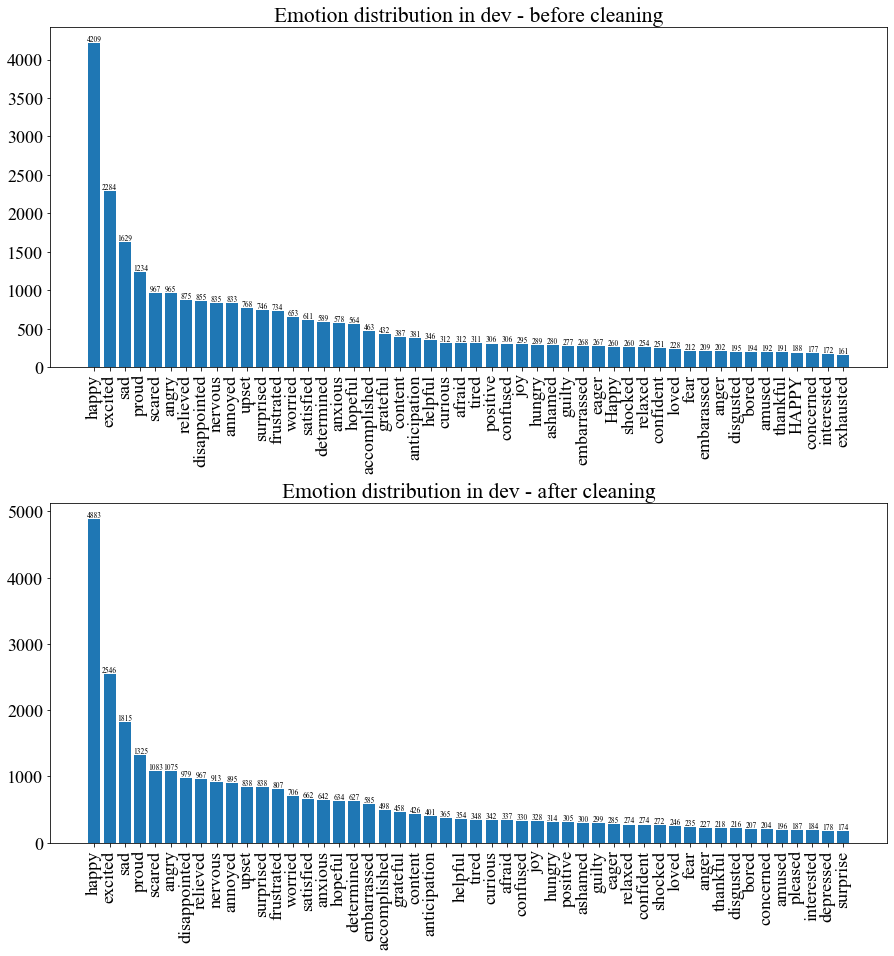

In [44]:
plt.rcParams['figure.figsize'] = (15.0, 15.0) 
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.subplot(2,1,1)
plt.rcParams['figure.figsize'] = (10.0, 5.0) 
plt.bar(originalEmoSum[1][1:]['emotion'][:50], originalEmoSum[1][1:]['freq'][:50])
plt.xticks(rotation=90) # 东西太多，旋转
plt.title("Emotion distribution in dev - before cleaning")
for emotion, freq in zip(originalEmoSum[1][1:]['emotion'][:50], originalEmoSum[1][1:]['freq'][:50]):
    plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=7.5)
    
plt.subplot(2,1,2)
plt.rcParams['figure.figsize'] = (10.0, 5.0) 
plt.bar(cleanEmoSum[1]['emotion'][:50], cleanEmoSum[1]['freq'][:50])
plt.xticks(rotation=90) # 东西太多，旋转
plt.title("Emotion distribution in dev - after cleaning")
for emotion, freq in zip(cleanEmoSum[1]['emotion'][:50], cleanEmoSum[1]['freq'][:50]):
    plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=7.5)
plt.show()

In [22]:
# calculate KL-divergence
import sklearn.metrics
cleanedValue = []
for x in list(originalEmoSum[1]['emotion']):    
    cleanedValue.append(dict(zip([x for x in cleanEmoSum[0].keys()], [x for x in cleanEmoSum[0].values()])).get(x, [0, 0])[0])
    
import torch
from torchmetrics.functional import kl_divergence
clean = torch.tensor([cleanedValue[1:]])
original = torch.tensor([list(originalEmoSum[1]['freq'][1:])])
print(kl_divergence(clean, original))

tensor(0.1604)


In [23]:
import torch
from torchmetrics.functional import kl_divergence
clean = torch.tensor([[1, 1, 1, 1]])
original = torch.tensor([[1, 4, 2, 3]])
print(kl_divergence(clean, original))

tensor(0.1218)


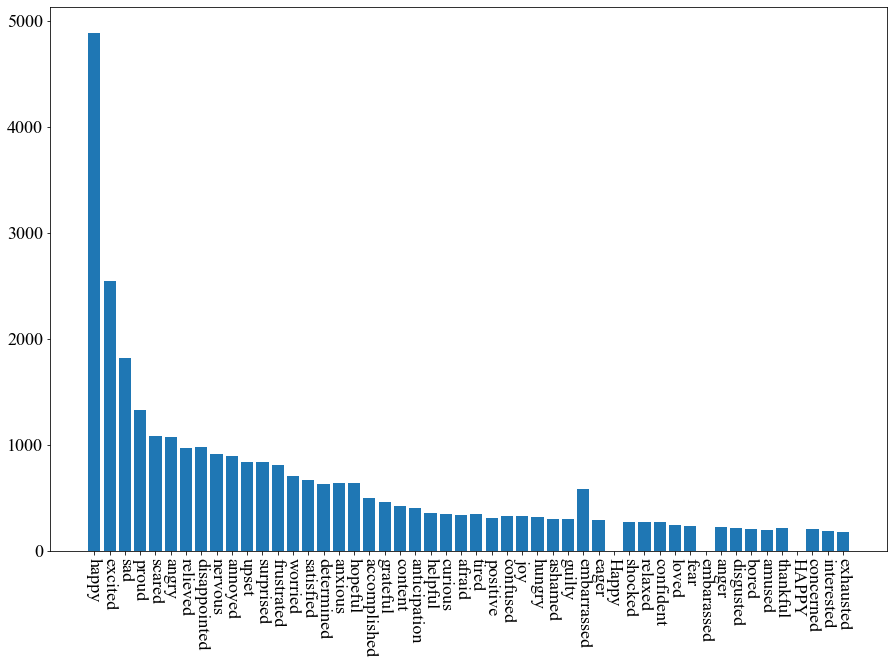

In [24]:
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rcParams.update({'font.family':'Times New Roman'})
upperBound = 50
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 10.0) 
# plt.grid(linestyle = '--', linewidth = 0.5)
size = upperBound
x = np.arange(size)
total_width, n = 0.35, 3
width = total_width / n
x = x - (total_width - width) / 2

# plt.bar(x - total_width/2, originalEmoSum[1]['freq'][1:upperBound+1], width=total_width, label='before cleaning')
plt.bar(x, cleanedValue[1:upperBound+1], label='after cleaning')
plt.xticks(x, originalEmoSum[1]['emotion'][1:upperBound+1])
plt.xticks(rotation=-90) # 东西太多，旋转
# plt.title("Emotion distribution: top 50, compare based on original rank")
#plt.legend()

plt.show()

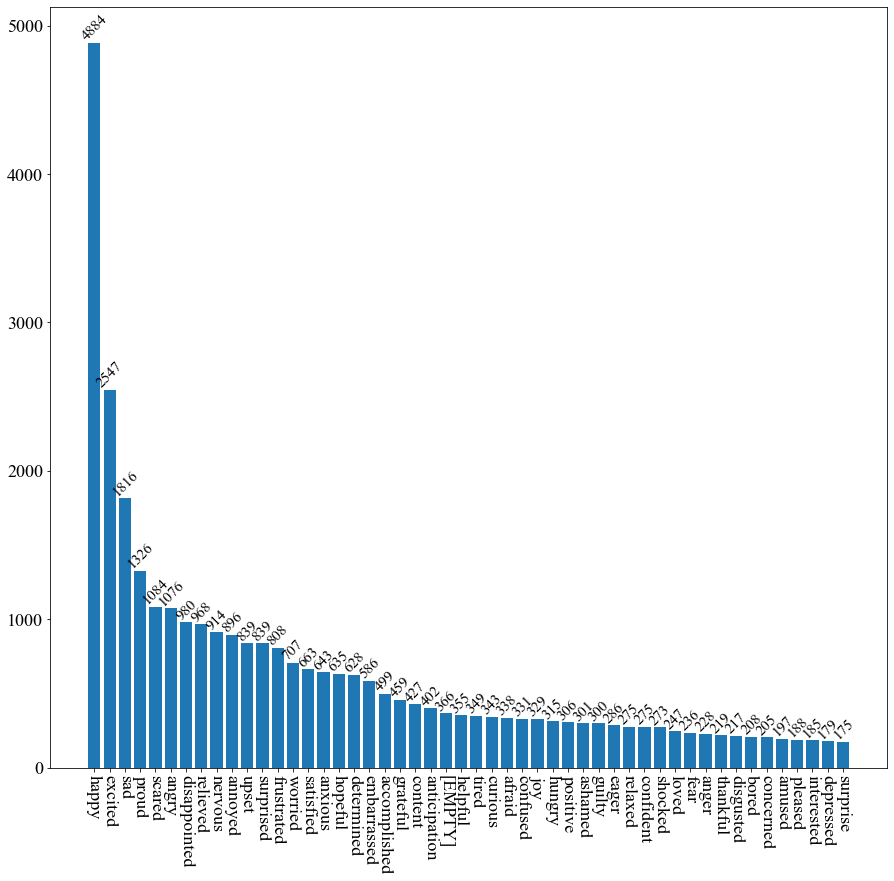

In [25]:
plt.rcParams['figure.figsize'] = (15.0, 14.0) 
plt.bar([x if x != '' else '[EMPTY]' for x in cleanEmoSum[1]['emotion'][:50]], cleanEmoSum[1]['freq'][:50])
plt.xticks(rotation=-90) # 东西太多，旋转
# plt.title("Emotion distribution in dev - after cleaning")
for emotion, freq in zip([x if x != '' else '[EMPTY]' for x in cleanEmoSum[1]['emotion'][:50]], cleanEmoSum[1]['freq'][:50]):
    plt.text(emotion, freq, freq+1, ha='center', va='bottom', fontsize=15, rotation=45)
plt.show()

In [26]:
[x if x != '' else '[EMPTY]' for x in cleanEmoSum[1]['emotion'][:50]]

['happy',
 'excited',
 'sad',
 'proud',
 'scared',
 'angry',
 'disappointed',
 'relieved',
 'nervous',
 'annoyed',
 'upset',
 'surprised',
 'frustrated',
 'worried',
 'satisfied',
 'anxious',
 'hopeful',
 'determined',
 'embarrassed',
 'accomplished',
 'grateful',
 'content',
 'anticipation',
 '[EMPTY]',
 'helpful',
 'tired',
 'curious',
 'afraid',
 'confused',
 'joy',
 'hungry',
 'positive',
 'ashamed',
 'guilty',
 'eager',
 'relaxed',
 'confident',
 'shocked',
 'loved',
 'fear',
 'anger',
 'thankful',
 'disgusted',
 'bored',
 'concerned',
 'amused',
 'pleased',
 'interested',
 'depressed',
 'surprise']

# count Emotion labeling number

In [45]:
data = cleanCombine
emotionCountClean = {}
emotionCountOriginal = {}
emotionCountCombine = {}
for dataRow in clean['emotion']:
    emotionCountClean[str(len(dataRow))] = emotionCountClean.get(str(len(dataRow)), 0)+1;
for dataRow in original['emotion']:
    emotionCountOriginal[str(len(dataRow))] = emotionCountOriginal.get(str(len(dataRow)), 0)+1;
for dataRow in cleanCombine['emotion']:
    emotionCountCombine[str(len(dataRow))] = emotionCountCombine.get(str(len(dataRow)), 0)+1;
    
emotionCountClean = dict(sorted(emotionCountClean.items(), key=lambda item: item[1], reverse = True))
emotionCountOriginal = dict(sorted(emotionCountOriginal.items(), key=lambda item: item[1], reverse = True))
emotionCountCombine = dict(sorted(emotionCountCombine.items(), key=lambda item: item[1], reverse = True))

In [46]:
emotionCountOriginal

{'1': 48645, '2': 3003, '3': 1586}

Text(0.5, 1.0, 'Clean - merged data')

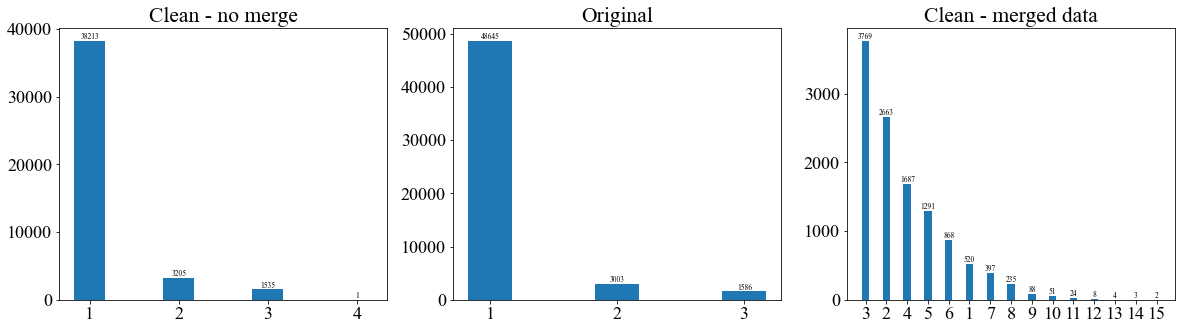

In [47]:
plt.rcParams['figure.figsize'] = (20.0, 5.0) 
plt.subplots_adjust(hspace=0.8, wspace=0.2)
plt.subplot(1,3,1)
plt.bar(emotionCountClean.keys(), emotionCountClean.values(), width=total_width, label='Clean - no merge')
for emotion, freq in zip(emotionCountClean.keys(), emotionCountClean.values()):
    plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=7.5)
plt.title("Clean - no merge")
plt.subplot(1,3,2)
plt.bar(emotionCountOriginal.keys(), emotionCountOriginal.values(), width=total_width, label='Original')
for emotion, freq in zip(emotionCountOriginal.keys(), emotionCountOriginal.values()):
    plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=7.5)
plt.title("Original")
plt.subplot(1,3,3)
plt.bar(emotionCountCombine.keys(), emotionCountCombine.values(), width=total_width, label='Clean - merge')
for emotion, freq in zip(emotionCountCombine.keys(), emotionCountCombine.values()):
    plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=7.5)
plt.title("Clean - merged data")

In [49]:
suma = 0;
for freq, values in zip(emotionCountCombine.keys(), emotionCountCombine.values()):
    suma += int(freq) * values
print(suma/sum(emotionCountCombine.values()))


3.618346253229974


In [77]:
(sum([len(x) for x in originalDev['plutchik']]) + sum([len(x) for x in originalTest['plutchik']]))/(len(originalDev['plutchik']) + len(originalTest['plutchik']))

2.3012889417360287

53234

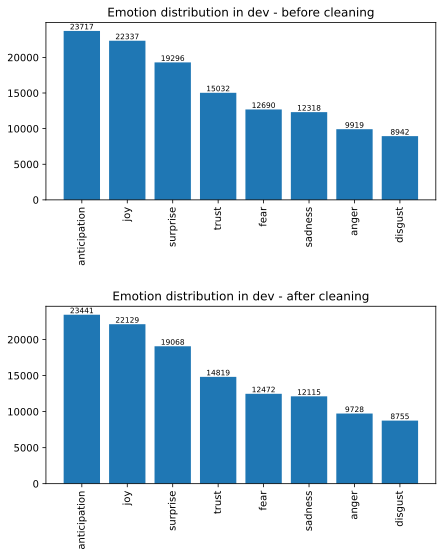

In [332]:
plt.rcParams['figure.figsize'] = (7.0, 8.5) 
plt.subplots_adjust(hspace=0.6, wspace=0.2)
plt.subplot(2,1,1)
plt.bar(originalPlutSum[1]['emotion'], originalPlutSum[1]['freq'])
plt.xticks(rotation=90) # 东西太多，旋转
plt.title("Emotion distribution in dev - before cleaning")
for emotion, freq in zip(originalPlutSum[1]['emotion'], originalPlutSum[1]['freq']):
    plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=7.5)
    
plt.subplot(2,1,2)
plt.bar(cleanPlutSum[1]['emotion'][:50], cleanPlutSum[1]['freq'][:50])
plt.xticks(rotation=90) # 东西太多，旋转
plt.title("Emotion distribution in dev - after cleaning")
for emotion, freq in zip(cleanPlutSum[1]['emotion'], cleanPlutSum[1]['freq']):
    plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=7.5)
plt.show()

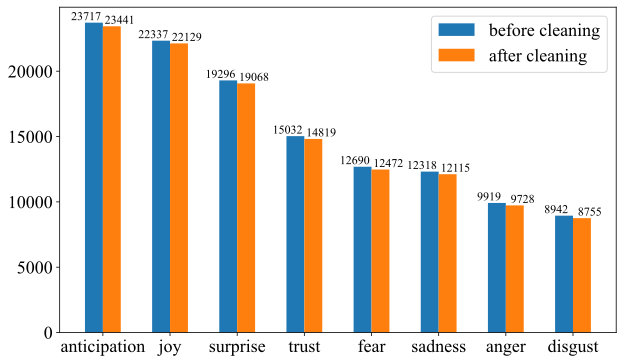

In [665]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 6.0) 
# plt.grid(linestyle = '--', linewidth = 0.5)
size = len(originalPlutSum[1]['emotion'])
x = np.arange(size)
total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x - width/2, list(originalPlutSum[1]['freq']), width=width, label='before cleaning')
plt.bar(x + width/2, list(cleanPlutSum[1]['freq']), width=width, label='after cleaning')
plt.xticks(x, originalPlutSum[1]['emotion'])
# plt.title("Plutchik counting - only freq: distribution stays the same")
for emotion, freq in zip(range(len(originalPlutSum[1]['emotion'])), originalPlutSum[1]['freq']):
        plt.text(emotion - width - 0.25, freq, freq, ha='center', va='bottom', fontsize=12)
for emotion, freq in zip(range(len(cleanPlutSum[1]['emotion'])), cleanPlutSum[1]['freq']):
        plt.text(emotion + width/2 - 0.15, freq, freq, ha='center', va='bottom', fontsize=12)
plt.legend()

plt.show()

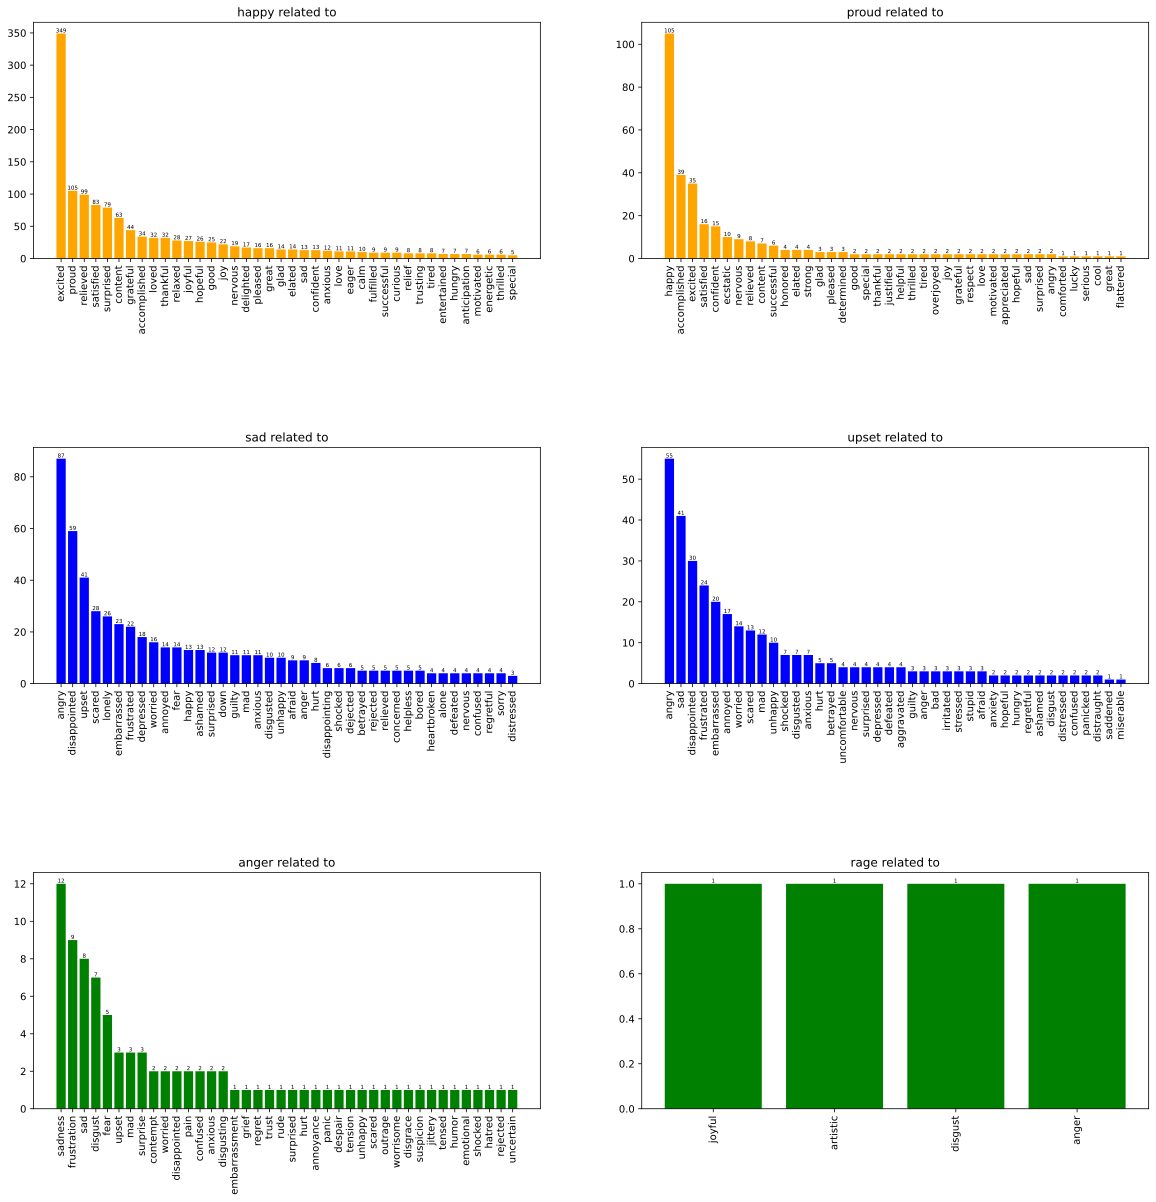

In [334]:
plt.rcParams['figure.figsize'] = (20.0, 20.0) 
plt.subplots_adjust(hspace=0.8, wspace=0.2)
plt.subplot(3,2,1)
drawRelated("happy", cleanEmoSum[1], 40, 'orange', 5.5)
plt.subplot(3,2,2)
drawRelated("proud", cleanEmoSum[1], 40, 'orange', 5.5)
plt.subplot(3,2,3)
drawRelated('sad', cleanEmoSum[1], 40, 'blue', 5.5)
plt.subplot(3,2,4)
drawRelated('upset', cleanEmoSum[1], 40, 'blue', 5.5)
plt.subplot(3,2,5)
drawRelated('anger', cleanEmoSum[1], 40, 'green', 5.5)
plt.subplot(3,2,6)
drawRelated('rage', cleanEmoSum[1], 40, 'green', 5.5)
# plt.savefig("majorEmotionRelation.svg")
plt.show()


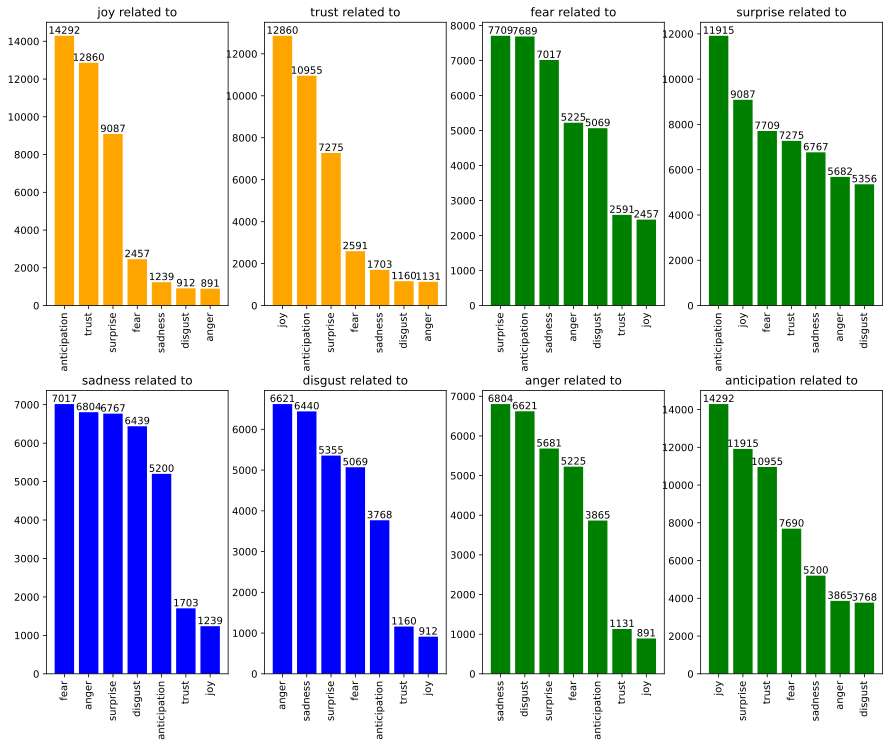

In [335]:
plt.rcParams['figure.figsize'] = (15.0, 12.0) 
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.subplot(2,4,1)
drawRelated("joy", cleanPlutSum[1], 40, 'orange', 10)
plt.subplot(2,4,2)
drawRelated("trust", cleanPlutSum[1], 40, 'orange', 10)
plt.subplot(2,4,3)
drawRelated('fear', cleanPlutSum[1], 40, 'green', 10)
plt.subplot(2,4,4)
drawRelated('surprise', cleanPlutSum[1], 40, 'green', 10)
plt.subplot(2,4,5)
drawRelated('sadness', cleanPlutSum[1], 40, 'blue', 10)
plt.subplot(2,4,6)
drawRelated('disgust', cleanPlutSum[1], 40, 'blue', 10)
plt.subplot(2,4,7)
drawRelated('anger', cleanPlutSum[1], 40, 'green', 10)
plt.subplot(2,4,8)
drawRelated('anticipation', cleanPlutSum[1], 40, 'green', 10)
# plt.savefig("majorEmotionRelation.svg")
plt.show()


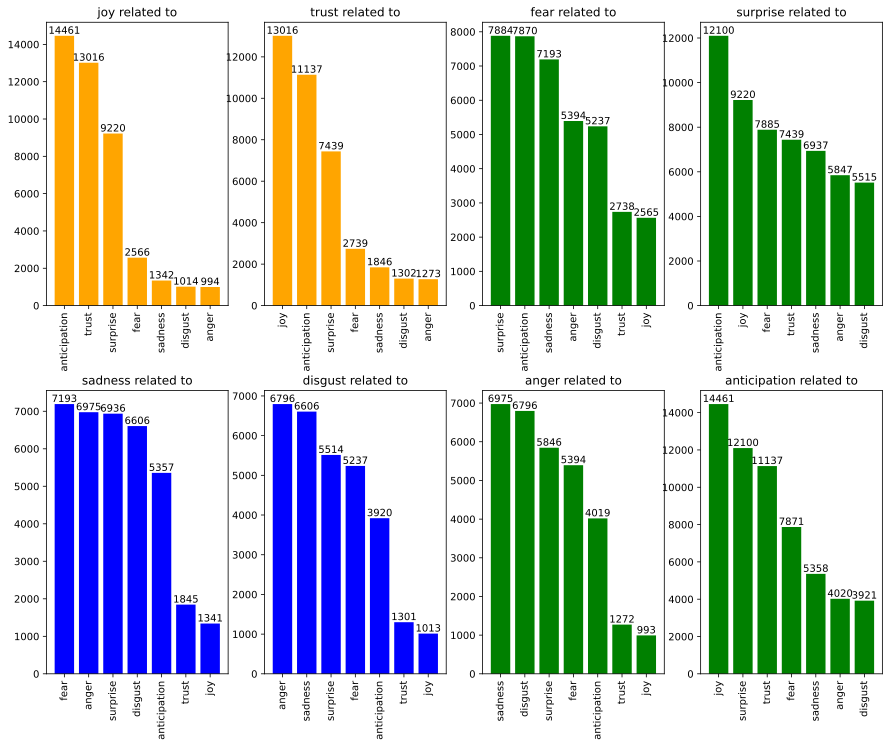

In [336]:
plt.rcParams['figure.figsize'] = (15.0, 12.0) 
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.subplot(2,4,1)
drawRelated("joy", originalPlutSum[1], 40, 'orange', 10)
plt.subplot(2,4,2)
drawRelated("trust", originalPlutSum[1], 40, 'orange', 10)
plt.subplot(2,4,3)
drawRelated('fear', originalPlutSum[1], 40, 'green', 10)
plt.subplot(2,4,4)
drawRelated('surprise', originalPlutSum[1], 40, 'green', 10)
plt.subplot(2,4,5)
drawRelated('sadness', originalPlutSum[1], 40, 'blue', 10)
plt.subplot(2,4,6)
drawRelated('disgust', originalPlutSum[1], 40, 'blue', 10)
plt.subplot(2,4,7)
drawRelated('anger', originalPlutSum[1], 40, 'green', 10)
plt.subplot(2,4,8)
drawRelated('anticipation', originalPlutSum[1], 40, 'green', 10)
# plt.savefig("majorEmotionRelation.svg")
plt.show()


In [154]:
cleanEmoSum[1].loc[cleanEmoSum[1]['emotion'] == '\'excited\'']

,emotion,freq,highly related,all related info
1,'excited',1855,"['happy', 'proud', 'nervous', 'surprised']","{''happy'': 934, ''proud'': 197, ''nervous'': ..."


In [248]:
cleanEmoSum[1].loc[cleanEmoSum[1]['emotion'] == 'sad']['all related info'].iloc[0]

{'disappointed': 280,
 'angry': 220,
 'upset': 219,
 'happy': 133,
 'frustrated': 130,
 'annoyed': 124,
 'scared': 121,
 'worried': 119,
 'embarrassed': 96,
 'depressed': 80,
 'ashamed': 76,
 'guilty': 75,
 'surprised': 71,
 'anger': 64,
 'lonely': 54,
 'positive': 52,
 'nervous': 50,
 'afraid': 48,
 'anxious': 47,
 'shocked': 47,
 'hurt': 46,
 'sadness': 45,
 'concerned': 42,
 'excited': 41,
 'mad': 40,
 'fear': 39,
 'confused': 37,
 'relieved': 35,
 'disgusted': 34,
 'sorry': 33,
 'hopeful': 33,
 'unhappy': 32,
 'bad': 29,
 'proud': 29,
 'tired': 29,
 'disappointing': 27,
 'determined': 27,
 'betrayed': 25,
 'regretful': 24,
 'defeated': 23,
 'irritated': 23,
 'stupid': 23,
 'rejected': 23,
 'bored': 23,
 'sick': 22,
 'surprise': 21,
 'sympathetic': 20,
 'pain': 20,
 'heartbroken': 19,
 'satisfied': 19,
 'fearful': 18,
 'powerful': 18,
 'down': 18,
 'dejected': 17,
 'content': 17,
 'grateful': 17,
 'amused': 17,
 'distressed': 16,
 'justified': 16,
 'devastated': 15,
 'hungry': 15,
 

In [241]:
list(cleanEmoSum[1].loc[cleanEmoSum[1]['emotion'] == 'happy']['all related info'])

[{'excited': 934,
  'proud': 410,
  'relieved': 300,
  'satisfied': 288,
  'surprised': 220,
  'content': 196,
  'grateful': 190,
  'joy': 172,
  'accomplished': 172,
  'loved': 154,
  'sad': 132,
  'hopeful': 131,
  'relaxed': 129,
  'positive': 128,
  'nervous': 109,
  'anticipation': 108,
  'helpful': 108,
  'thankful': 107,
  'pleased': 101,
  'joyful': 99,
  'eager': 97,
  'anxious': 94,
  'elated': 91,
  'good': 84,
  'curious': 83,
  'determined': 80,
  'loving': 74,
  'scared': 73,
  'annoyed': 72,
  'hungry': 69,
  'thrilled': 67,
  'interested': 67,
  'ecstatic': 67,
  'disappointed': 64,
  'tired': 63,
  'angry': 62,
  'friendly': 58,
  'delighted': 57,
  'confident': 56,
  'worried': 56,
  'excitement': 54,
  'lucky': 54,
  'upset': 53,
  'embarrassed': 49,
  'amused': 48,
  'glad': 48,
  'overjoyed': 46,
  'relief': 43,
  'surprise': 43,
  'happiness': 42,
  'nostalgic': 42,
  'calm': 40,
  'competent': 40,
  'great': 39,
  'fun': 39,
  'love': 39,
  'intrigued': 39,
  'ad